In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

In [2]:
data = pd.read_csv('marketing_data.csv')

In [24]:
pwd

'C:\\Users\\muska\\visual\\Marketing_Analytics-main\\Marketing_Analytics-main'

In [4]:
data
#recency = no of days since customers last purchase
#mnt = last 2 years amount spent on items
#numdeals = no of purchase made with discount
#webvisit= last month
#cmp = Campaign 1 where customer made a purchase
#cmp2 = 2 if accepted
#response= accepted in last campaign
#complain= if complained in last 2 years


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


To clean the data we will get an overview

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
#income has space in front not an integer has $sign
#dt customer type should be datetime 
#income has missing value

In [7]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# set up to view all the info of the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Get an overview of stats

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


Make a copy of data so that original dataset is not lost while exploration

In [9]:
df = data.copy()

Data cleaning

In [10]:
df.rename(columns={' Income ':'Income'}, inplace=True)

In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

convert stcustomer

In [12]:
from datetime import datetime


In [13]:
df.Dt_Customer=pd.to_datetime(df.Dt_Customer)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   object        
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

convert income

In [15]:
df.Income=df.Income.str.strip('$')
df.Income = df.Income.str.replace(',','')
df.Income = df.Income.str.replace('.','')
df.Income = df.Income.str.replace('00','')

For missing values in Income column it is better to fill nan value with median val of entire income

In [16]:
df.Income.median()

50510.5

In [17]:
df['Income']=df['Income'].fillna(50121.5)

In [18]:
df.Income=df.Income.astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

we have our clean data

Prepare dataset for exploring 

In [20]:
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2',
                              'AcceptedCmp3', 'AcceptedCmp4',
                              'AcceptedCmp5', 'Response',
                              'Complain']).select_dtypes(include=np.number)
#new df where we ask is to drop above columns
#ND then select columns only with numbers in them

Year_Birth                 AxesSubplot(0.125,0.71587;0.168478x0.16413)
Income                  AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Kidhome                 AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Teenhome                AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recency                   AxesSubplot(0.125,0.518913;0.168478x0.16413)
MntWines               AxesSubplot(0.327174,0.518913;0.168478x0.16413)
MntFruits              AxesSubplot(0.529348,0.518913;0.168478x0.16413)
MntMeatProducts        AxesSubplot(0.731522,0.518913;0.168478x0.16413)
MntFishProducts           AxesSubplot(0.125,0.321957;0.168478x0.16413)
MntSweetProducts       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
MntGoldProds           AxesSubplot(0.529348,0.321957;0.168478x0.16413)
NumDealsPurchases      AxesSubplot(0.731522,0.321957;0.168478x0.16413)
NumWebPurchases              AxesSubplot(0.125,0.125;0.168478x0.16413)
NumCatalogPurchases       AxesSubplot(0.327174,0.125;0.168478x0.16413)
NumSto

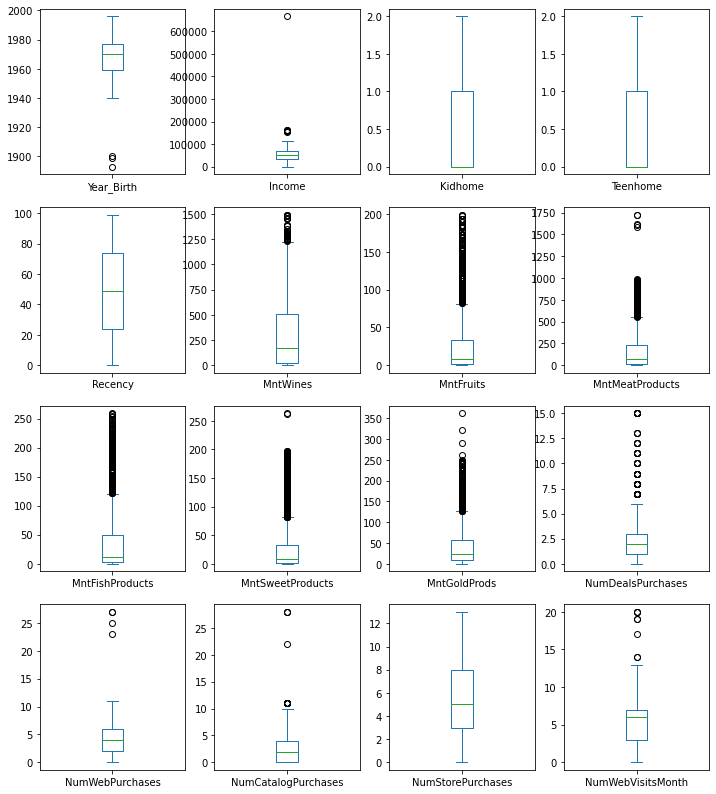

In [21]:
#check for outlier
df_to_plot.plot(subplots=True,kind='box',layout=(4,4),
                figsize=(12,14))

In [22]:
#the outliers in Year_birth seems like entry errors since 
#it's impossible that people who was born before 1900 still alive.So we drop them 

In [23]:
# Remove outliers in year_birth
new_df = df[df.Year_Birth >= (df.Year_Birth.mean()-3*df.Year_Birth.std())]
new_df.Year_Birth.describe()

count    2237.000000
mean     1968.901654
std        11.701917
min      1940.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64